In [1]:
import os
import cv2
import time
import argparse
from detector import DetectorTF2
import numpy as np 

def DetectImagesFromFolder(detector, images_dir, save_output=True, output_dir='output/'): 
	result = [] 

	for dir in os.scandir("../data/IMG_all/train/"): 
		if dir.is_dir():
			for file in os.scandir(dir.path): 
				_, file_extension = os.path.splitext(file.path)
				if file.is_file() and file_extension in [".png", ".jpg", ".jpeg"]: 
					image = cv2.imread(file.path)                
					det_boxes = detector.DetectFromImage(image) 
					image_detections = detector.DisplayDetections(image, det_boxes)

					if save_output:
						ug_out = os.path.join(output_dir, dir.name) 
						if not os.path.isdir(ug_out): 
							os.mkdir(ug_out)

						img_out = os.path.join(ug_out, file.name)
						if cv2.imwrite(img_out, image_detections): 
							for idx in range(len(det_boxes)): 
								result.append({
									"UrunGrubu": dir.name, 
									"File" : file.name, 
									"count": idx,
									"x_min": det_boxes[idx][0],
									"y_min": det_boxes[idx][1],
									"x_max": det_boxes[idx][2],
									"y_max": det_boxes[idx][3],
									"score": str(np.round(det_boxes[idx][-1], 4))
								})
	return result

In [2]:
detector = DetectorTF2(
    "../trained_model/frozen_model_ckpt_20/saved_model/", 
    path_to_labelmap="../trained_model/frozen_model_1/labelmap.pbtxt",
    threshold=0.60
)

In [4]:
res = DetectImagesFromFolder(detector, None, output_dir="../data/IMG_all/out_ckpt20/")

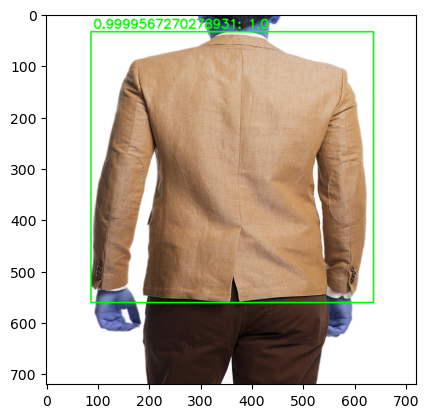

In [12]:
import matplotlib.pyplot as plt 
img = cv2.imread("../data/IMG_all/train/CEKET/6.png")
det_boxes = detector.DetectFromImage(img)
image_detections = detector.DisplayDetections(img, det_boxes)
plt.imshow(image_detections)